<a href="https://colab.research.google.com/github/Vanshree005/FUTURE_ML_01/blob/main/ML_1_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')


df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], infer_datetime_format=True, errors='coerce')

# Drop rows where ORDERDATE could not be parsed
df = df.dropna(subset=['ORDERDATE'])

# Basic overview
print("Parsed ORDERDATE range:", df['ORDERDATE'].min(), "to", df['ORDERDATE'].max())
print("\nMissing values after parsing:")
print(df.isnull().sum())

Parsed ORDERDATE range: 2003-01-06 00:00:00 to 2005-05-31 00:00:00

Missing values after parsing:
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


<ipython-input-2-a7052cb73334>:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], infer_datetime_format=True, errors='coerce')


<ipython-input-6-c7bec76f44f0>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('ORDERDATE').resample('M')['SALES'].sum()


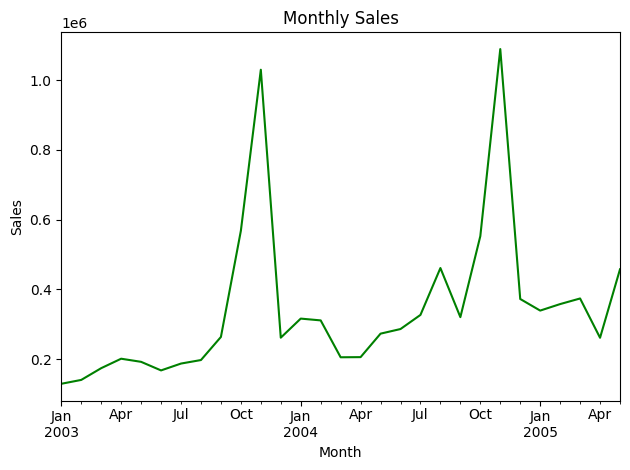

In [6]:
#rime series:montly sales
monthly_sales = df.set_index('ORDERDATE').resample('M')['SALES'].sum()
plt.figure()
monthly_sales.plot(color='green')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


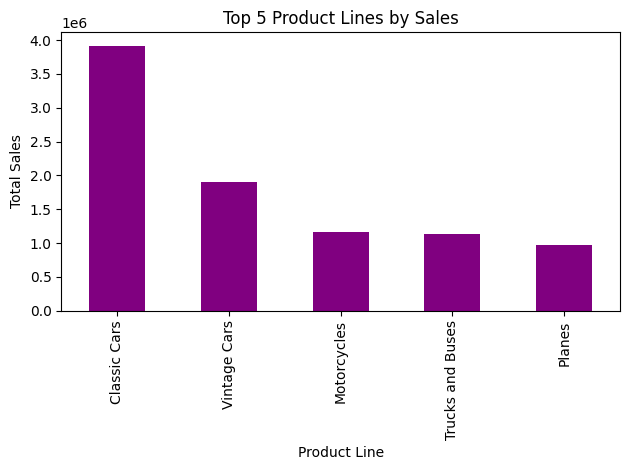

In [8]:
# Top 5 Product Lines by Sales
product_sales = df.groupby('PRODUCTLINE')['SALES'].sum().nlargest(5)
plt.figure()
product_sales.plot(kind='bar', color='purple')
plt.title('Top 5 Product Lines by Sales')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

